<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
"""2-5.human_activity.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1kh308sbjEmsrASCsFp1NrDTH3VhUEr94
"""

import pandas as pd
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



/content/drive/MyDrive/멀캠 수업자료/data


In [28]:
# 학습/시험 데이터를 읽어온다.
x_train = np.array(pd.read_csv('/content/drive/MyDrive/멀캠 수업자료/data/UCI/train/X_train.txt', sep='\s+', header=None))
x_test = np.array(pd.read_csv('/content/drive/MyDrive/멀캠 수업자료/data/UCI/test/X_test.txt', sep='\s+', header=None))

In [16]:
# class 데이터를 읽어온다.
y_train = np.array(pd.read_csv('/content/drive/MyDrive/멀캠 수업자료/data/UCI/train/y_train.txt', sep='\s+', header=None))
y_test = np.array(pd.read_csv('/content/drive/MyDrive/멀캠 수업자료/data/UCI/test/y_test.txt', sep='\s+', header=None))

y_train -= 1  # 1 ~ 6을 0 ~ 5로 변환
y_test -= 1

In [17]:
# class를 one-hot으로 변환한다.
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

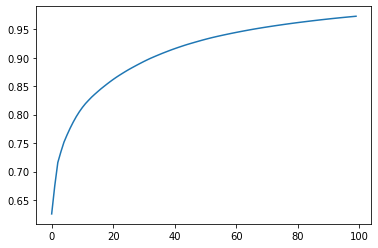

In [18]:
# 차원축소
pc = PCA(n_components=100)
x_train = pc.fit_transform(x_train)
x_test = pc.transform(x_test)

np.unique(y_train.reshape(-1), return_counts=True)

plt.plot(np.cumsum(pc.explained_variance_ratio_))

In [19]:
# 모델
x_input = Input(batch_shape=(None, x_train.shape[1]))
h_layer = Dense(32, activation='relu')(x_input)
h_layer = Dropout(rate=0.5)(h_layer)
h_layer = Dense(32, activation='relu')(h_layer)
h_layer = Dropout(rate=0.5)(h_layer)
y_output = Dense(6, activation='softmax')(h_layer)

model = Model(x_input, y_output)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.0005))
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 4,486
Trainable params: 4,486
Non-trainable par

In [20]:
# 학습
hist = model.fit(x_train, y_train_ohe, epochs=100, batch_size=64, validation_data=(x_test, y_test_ohe))

Epoch 1/100
115/115 [==============================] - 1s 4ms/step - loss: 1.9469 - val_loss: 1.4166
Epoch 2/100
115/115 [==============================] - 0s 3ms/step - loss: 1.4091 - val_loss: 1.0144
Epoch 3/100
115/115 [==============================] - 0s 3ms/step - loss: 1.1276 - val_loss: 0.7282
Epoch 4/100
115/115 [==============================] - 0s 3ms/step - loss: 0.9106 - val_loss: 0.5611
Epoch 5/100
115/115 [==============================] - 0s 3ms/step - loss: 0.7853 - val_loss: 0.4597
Epoch 6/100
115/115 [==============================] - 0s 3ms/step - loss: 0.6837 - val_loss: 0.3949
Epoch 7/100
115/115 [==============================] - 0s 3ms/step - loss: 0.5898 - val_loss: 0.3370
Epoch 8/100
115/115 [==============================] - 0s 3ms/step - loss: 0.5353 - val_loss: 0.2941
Epoch 9/100
115/115 [==============================] - 0s 3ms/step - loss: 0.4870 - val_loss: 0.2621
Epoch 10/100
115/115 [==============================] - 0s 3ms/step - loss: 0.4455 - val_lo

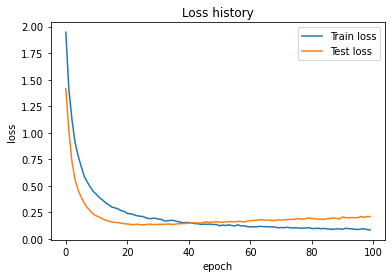

In [21]:
# Loss history
plt.plot(hist.history['loss'], label='Train loss')
plt.plot(hist.history['val_loss'], label='Test loss')
plt.legend()
plt.title("Loss history")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [22]:
# 평가 데이터로 target을 추정한다.
pred_prob = model.predict(x_test)

# 추정된 target의 정확도를 평가한다.
y_pred = np.argmax(pred_prob, axis=1).reshape(-1,1)
print("정확도 : {0:.4f}".format((y_test == y_pred).mean()))

정확도 : 0.9494


In [23]:
y_test.shape

(2947, 1)